### Decision Tree

In [1]:
import pandas as pd
import numpy as np

#모델 라이브러리 선언
from sklearn import datasets,tree

#모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### 데이터 전처리

In [2]:
featureData = pd.read_csv('./data/feature_regression_example.csv')

In [3]:
featureData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [4]:
featureData["PRO_YN"] = np.where(featureData.PROMOTION == 'Y', 1,0)
featureData["HO_YN"] = np.where(featureData.HOLIDAY == 'Y', 1,0)

featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0


##### get_dummies -> 열해당 열 데이터의 문자열을 숫자로 바꿔준다

In [5]:
featureData = pd.concat([featureData,pd.get_dummies(prefix="PROMO",data=featureData.PROMOTION)],axis=1)
featureData = pd.concat([featureData,pd.get_dummies(prefix="HOLYMO",data=featureData.HOLIDAY)],axis=1)

featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,0,1,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0,0,1,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0,0,1,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1,0,1,0,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0,0,1,1,0


###### labelEncoder 

In [6]:
from sklearn.preprocessing import LabelEncoder
le_pro = LabelEncoder()
le_holy = LabelEncoder()
featureData['PRO_ECO'] = le_pro.fit_transform(featureData.PROMOTION)
featureData["HOLY_ENCO"] = le_holy.fit_transform(featureData.HOLIDAY)

featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y,PRO_ECO,HOLY_ENCO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,0,1,0,1,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0,0,1,1,0,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0,0,1,1,0,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1,0,1,0,1,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0,0,1,1,0,1,0


##### 복구방법

In [7]:
le_pro.inverse_transform(featureData["HOLY_ENCO"])

C:\Users\SMART-24\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'N'], dtype=object)

###### dictionary mapping 

In [8]:
binarymap = {"Y":1,"N":0}
featureData["PRO_DICT"] = featureData.PROMOTION.map(binarymap)
featureData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,...,PRO_PERCENT,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y,PRO_ECO,HOLY_ENCO,PRO_DICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,...,0.209442,1,1,0,1,0,1,1,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,...,0.209442,1,0,0,1,1,0,1,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,...,0.208155,1,0,0,1,1,0,1,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,...,0.208155,1,1,0,1,0,1,1,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,...,0.208155,1,0,0,1,1,0,1,0,1


#### 특성 선정 / 데이터분리

In [9]:
featureData = featureData[(featureData.YEARWEEK >= 201501 & (featureData.YEARWEEK <= 201652))]

In [10]:
corrDf = featureData.corr()

corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y,PRO_ECO,HOLY_ENCO,PRO_DICT
YEARWEEK,1.000000,0.961051,0.213022,0.037392,-0.030681,0.300320,0.108551,0.009395,-0.108551,0.108551,-0.009395,0.009395,0.108551,0.009395,0.108551
YEAR,0.961051,1.000000,-0.065302,-0.048803,0.067443,0.208435,0.085606,-0.070803,-0.085606,0.085606,0.070803,-0.070803,0.085606,-0.070803,0.085606
WEEK,0.213022,-0.065302,1.000000,0.307541,-0.349205,0.347462,0.089293,0.284231,-0.089293,0.089293,-0.284231,0.284231,0.089293,0.284231,0.089293
QTY,0.037392,-0.048803,0.307541,1.000000,-0.544920,0.712772,0.630081,0.514813,-0.630081,0.630081,-0.514813,0.514813,0.630081,0.514813,0.630081
HCLUS,-0.030681,0.067443,-0.349205,-0.544920,1.000000,-0.552991,-0.386926,-0.974902,0.386926,-0.386926,0.974902,-0.974902,-0.386926,-0.974902,-0.386926
PRO_PERCENT,0.300320,0.208435,0.347462,0.712772,-0.552991,1.000000,0.903477,0.496585,-0.903477,0.903477,-0.496585,0.496585,0.903477,0.496585,0.903477
PRO_YN,0.108551,0.085606,0.089293,0.630081,-0.386926,0.903477,1.000000,0.378861,-1.000000,1.000000,-0.378861,0.378861,1.000000,0.378861,1.000000
HO_YN,0.009395,-0.070803,0.284231,0.514813,-0.974902,0.496585,0.378861,1.000000,-0.378861,0.378861,-1.000000,1.000000,0.378861,1.000000,0.378861
PROMO_N,-0.108551,-0.085606,-0.089293,-0.630081,0.386926,-0.903477,-1.000000,-0.378861,1.000000,-1.000000,0.378861,-0.378861,-1.000000,-0.378861,-1.000000
PROMO_Y,0.108551,0.085606,0.089293,0.630081,-0.386926,0.903477,1.000000,0.378861,-1.000000,1.000000,-0.378861,0.378861,1.000000,0.378861,1.000000


In [11]:
featuewsStd = 0.5
features = list(corrDf[abs(corrDf.QTY) > featuewsStd].index)

label = ['QTY']

featureData = featureData.sort_index()

alldataNum = 0.8
testIndex = round(len(featureData.YEARWEEK) * alldataNum)
testIndex

trainingData = featureData.iloc[0:testIndex,:]
testData = featureData.iloc[testIndex:,:]
trainingData_features = trainingData[features]
trainingData_label = trainingData[label]
testData_features = testData[features]
testData_label = testData[label]

### 모델 적용 

In [12]:
model_method = tree.DecisionTreeRegressor(random_state=1)
model = model_method.fit(trainingData_features,trainingData_label)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

### 예측 

In [13]:
predict = model.predict(testData_features)
predict

predictData = pd.DataFrame(predict)
predictData.columns = ["PREDICT"]

predictData

testData = testData.reset_index(drop=True)
resultData = pd.concat([testData,predictData],axis=1)

In [14]:
resultData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,...,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y,PRO_ECO,HOLY_ENCO,PRO_DICT,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,...,1,1,0,1,0,1,1,1,1,1685.0
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,...,1,1,0,1,0,1,1,1,1,1522.0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,...,1,1,0,1,0,1,1,1,1,1504.0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,...,1,0,0,1,1,0,1,0,1,1504.0
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,...,1,0,0,1,1,0,1,0,1,753.0
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,...,1,0,0,1,1,0,1,0,1,2100.0
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,...,1,0,0,1,1,0,1,0,1,2505.0
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201641,2016,41,2010,Y,2,...,1,1,0,1,0,1,1,1,1,2069.0
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201642,2016,42,1900,N,4,...,1,0,0,1,1,0,1,0,1,1773.0
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201643,2016,43,141,N,4,...,0,0,1,0,1,0,0,0,0,147.0


In [15]:
mean_absolute_error(resultData['QTY'], resultData['PREDICT'])

35.76190476190476

In [16]:
mean_squared_error(resultData['QTY'], resultData['PREDICT'])

2951.190476190476

In [17]:
r2_score(resultData['QTY'], resultData['PREDICT'])   

0.9949671873647997

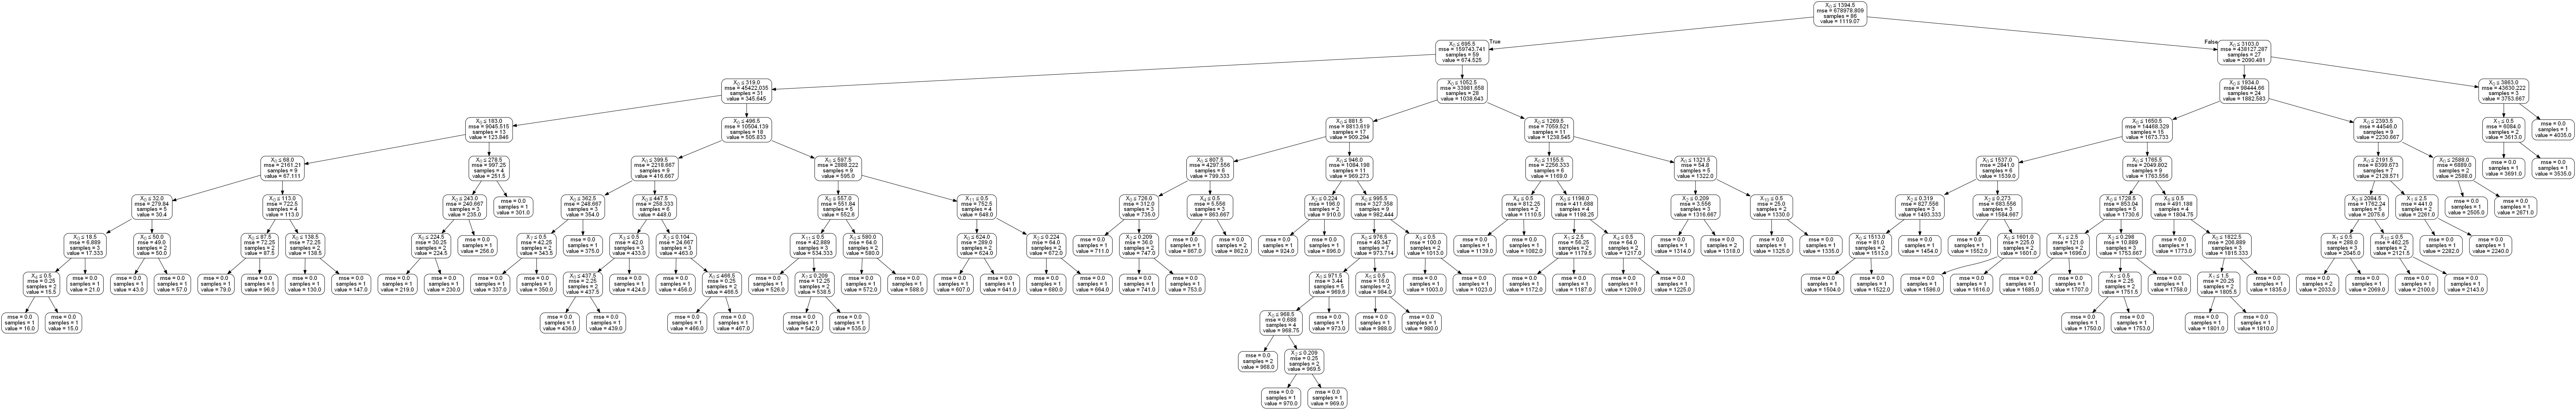

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Ramdom forests

In [19]:
trainingData_features.dtypes

QTY              int64
HCLUS            int64
PRO_PERCENT    float64
PRO_YN           int32
HO_YN            int32
PROMO_N          uint8
PROMO_Y          uint8
HOLYMO_N         uint8
HOLYMO_Y         uint8
PRO_ECO          int64
HOLY_ENCO        int64
PRO_DICT         int64
dtype: object

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_method_random = RandomForestClassifier(criterion="entropy",n_estimators=10,n_jobs=2,random_state=1)

model_random = model_method_random.fit(trainingData_features,trainingData_label)

model_random

predictR = model_random.predict(testData_features)

predictRData = pd.DataFrame(predictR)
predictRData.columns = ["PREDICT"]

resultRData = pd.concat([testData,predictRData],axis=1)
resultRData

C:\Users\SMART-24\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\SMART-24\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,...,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y,PRO_ECO,HOLY_ENCO,PRO_DICT,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,...,1,1,0,1,0,1,1,1,1,1685
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,...,1,1,0,1,0,1,1,1,1,1586
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,...,1,1,0,1,0,1,1,1,1,1586
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,...,1,0,0,1,1,0,1,0,1,1504
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,...,1,0,0,1,1,0,1,0,1,896
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,...,1,0,0,1,1,0,1,0,1,2100
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,...,1,0,0,1,1,0,1,0,1,2240
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201641,2016,41,2010,Y,2,...,1,1,0,1,0,1,1,1,1,2143
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201642,2016,42,1900,N,4,...,1,0,0,1,1,0,1,0,1,2100
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201643,2016,43,141,N,4,...,0,0,1,0,1,0,0,0,0,147


In [21]:
mean_absolute_error(resultRData['QTY'], resultRData['PREDICT'])

mean_squared_error(resultRData['QTY'], resultRData['PREDICT'])

r2_score(resultRData['QTY'], resultRData['PREDICT'])   

0.904547582172579

### Linear Regression 

In [22]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

model_method_Linear = LinearRegression()

model_Linear = model_method_Linear.fit(trainingData_features,trainingData_label)

predictL = model_Linear.predict(testData_features)

predictLData = pd.DataFrame(predictL)
predictLData.columns = ["PREDICT"]

resultLData = pd.concat([testData,predictLData],axis=1)
resultLData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,...,PRO_YN,HO_YN,PROMO_N,PROMO_Y,HOLYMO_N,HOLYMO_Y,PRO_ECO,HOLY_ENCO,PRO_DICT,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,...,1,1,0,1,0,1,1,1,1,1700.0
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,...,1,1,0,1,0,1,1,1,1,1514.0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,...,1,1,0,1,0,1,1,1,1,1501.0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,...,1,0,0,1,1,0,1,0,1,1491.0
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,...,1,0,0,1,1,0,1,0,1,806.0
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,...,1,0,0,1,1,0,1,0,1,2111.0
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,...,1,0,0,1,1,0,1,0,1,2400.0
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201641,2016,41,2010,Y,2,...,1,1,0,1,0,1,1,1,1,2010.0
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201642,2016,42,1900,N,4,...,1,0,0,1,1,0,1,0,1,1900.0
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201643,2016,43,141,N,4,...,0,0,1,0,1,0,0,0,0,141.0


## 과제 

In [23]:
carsData = pd.read_csv('https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/cars.csv')
carsData.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [24]:
carsData.dtypes

age       int64
gender    int64
miles     int64
debt      int64
income    int64
sales     int64
dtype: object

In [25]:
carsData = carsData.sort_values(by='debt')
carsData = carsData.reset_index(drop=True)

In [26]:
CcorrDf = carsData.corr()
CcorrDf

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [27]:
featuewsStd = 0.5
features = list(CcorrDf[abs(CcorrDf.debt) > featuewsStd].index)
features

['miles', 'debt', 'sales']

In [28]:
label = ['sales']

alldataNum = 0.8
testIndex = round(len(carsData.age) * alldataNum)
testIndex

770

In [29]:
trainingData = carsData.iloc[0:testIndex,:]
testData = carsData.iloc[testIndex:,:]

In [30]:
trainingData_features = trainingData[features]
trainingData_label = trainingData[label]
testData_features = testData[features]
testData_label = testData[label]

In [31]:
model_method = tree.DecisionTreeRegressor(random_state=1)
model = model_method.fit(trainingData_features,trainingData_label)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [32]:
predict = model.predict(testData_features)
predict

predictData = pd.DataFrame(predict)
predictData.columns = ["PREDICT"]

predictData.head()

,PREDICT
0,19173.0
1,18398.0
2,19634.0
3,20323.0
4,20942.0


In [33]:
testData = testData.reset_index(drop=True)
resultData = pd.concat([testData,predictData],axis=1)
resultData.head()

,age,gender,miles,debt,income,sales,PREDICT
0,40,1,34,31178,8114,19181,19173.0
1,27,0,41,31423,11364,18537,18398.0
2,42,1,41,32122,8596,19621,19634.0
3,52,1,46,32748,8779,20304,20323.0
4,32,1,23,33119,7261,20956,20942.0


In [34]:
mean_absolute_error(resultData['sales'], resultData['PREDICT'])

483.6476683937824

In [35]:
mean_squared_error(resultData['sales'], resultData['PREDICT'])

452539.08808290155

In [36]:
r2_score(resultData['sales'], resultData['PREDICT'])   

0.9464925585772996

## 과제2 

In [49]:
newDecisionData = pd.read_csv('https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/kopo_decision_tree_all_new.csv')
newDecisionData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,A01,PG01,P01,ITEM001,201538,2015,38,1,N,4,N,0.0
1,A01,PG01,P01,ITEM001,201548,2015,48,1,Y,0,N,0.0
2,A01,PG01,P01,ITEM001,201549,2015,49,2,Y,0,N,0.0
3,A01,PG01,P01,ITEM002,201526,2015,26,1,Y,1,N,0.0
4,A01,PG01,P01,ITEM002,201532,2015,32,1,N,4,N,0.0


In [50]:
newDecisionData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [51]:
groupKey = ["REGIONID","PRODUCTGROUP","PRODUCT","ITEM"]

groupData = newDecisionData.groupby(groupKey)
len(groupData)

len(newDecisionData[groupKey].drop_duplicates())

len(newDecisionData.ITEM)

In [90]:
oneGroup = groupData.get_group(list(groupData.groups)[8])
len(oneGroup)
#     if(len(oneGroup.ITEM) < 26):


eachGroup = oneGroup.reset_index(drop=True)

#### 1.상관관계를 산출한다. features와, label를 정의한다.
corrDf = eachGroup.corr()
features = list(corrDf[(abs(corrDf.QTY > 0.5) & (corrDf.QTY != 1))].index)
label = ['QTY']

#### 2.데이터를 분리한다 features, label
stdIndex = round(len(eachGroup) * 0.8)

stdYearweek = eachGroup.loc[stdIndex,["YEARWEEK"]].values[0]
stdYearweek

trainingData_features = eachGroup[eachGroup.YEARWEEK <= stdYearweek][features]
trainingData_label = eachGroup[eachGroup.YEARWEEK <= stdYearweek][label]
testData_features = eachGroup[eachGroup.YEARWEEK  > stdYearweek][features]
testData_label = eachGroup[eachGroup.YEARWEEK > stdYearweek][label]
testData_label2 = eachGroup[eachGroup.YEARWEEK > stdYearweek]

#### 3.모델 선언 및 학습
from sklearn import tree
model_method = tree.DecisionTreeRegressor()
model = model_method.fit(trainingData_features,trainingData_label)

#### 4.예측
predict = model.predict(testData_features)

print(predict)
print(len(predict))
for i in range(0,1):
    predictData = pd.DataFrame(predict)
    print(predictData)
    testData_label2["PREDICT"] = 

testData_label2
#     predictData = pd.DataFrame(predict)
#     predictData.columns = ["PREDICT"]

#     testData_label2["PREDICT"] = model.predict(testData_features)



[16.82142857 16.82142857 16.82142857 16.82142857 16.82142857 38.79166667
 38.79166667 38.79166667 38.79166667 10.4        10.4        10.4
 10.4        10.4        10.4        10.4        10.4       ]
17
            0
0   16.821429
1   16.821429
2   16.821429
3   16.821429
4   16.821429
5   38.791667
6   38.791667
7   38.791667
8   38.791667
9   10.400000
10  10.400000
11  10.400000
12  10.400000
13  10.400000
14  10.400000
15  10.400000
16  10.400000


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [77]:
groupData2 = newDecisionData.groupby(groupKey).apply(mlFcst)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [78]:
groupData2

NameError: name 'groupData2' is not defined